#Ejercicio 11
Capturar audio del micrófono, definir una función para el filtrado de media móvil exponencial, aplicar el filtro con factores 0.6, 0.2 y 0.05, visualizar las señales originales y filtradas superpuestas, y analizar el espectro de frecuencia de las señales originales y filtradas.

##Capturar audio

Capturar audio del micrófono durante unos segundos.

In [ ]:
!pip install sounddevice

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving pianoLA4.wav to pianoLA4.wav


In [ ]:
import soundfile as sf
import numpy as np

# Cargar el archivo de audio
audio_data, sampling_rate = sf.read('pianoLA4.wav')

# Convertir estéreo a mono si es necesario
if len(audio_data.shape) > 1:
  audio_data = np.mean(audio_data, axis=1)

# Obtener la duración del audio
duration = len(audio_data) / sampling_rate

print(f"Audio cargado exitosamente con frecuencia de muestreo: {sampling_rate} Hz")
print(f"Duración del audio: {duration:.2f} segundos")

Audio cargado exitosamente con frecuencia de muestreo: 44100 Hz
Duración del audio: 5.27 segundos


##Definir función de media móvil exponencial

Definir una función para aplicar un filtro de media móvil exponencial a la señal de audio.

In [ ]:
def exponential_moving_average(signal, alpha):
  """Aplica un filtro de media móvil exponencial a una señal.

  Args:
    signal: La señal de entrada (una lista o array de numpy).
    alpha: El factor de suavizado (entre 0 y 1).

  Returns:
    La señal filtrada (un array de numpy).
  """
  filtered_signal = np.zeros_like(signal)
  if len(signal) > 0:
    filtered_signal[0] = signal[0]
    for i in range(1, len(signal)):
      filtered_signal[i] = alpha * signal[i] + (1 - alpha) * filtered_signal[i-1]
  return filtered_signal

#Aplicar filtro con diferentes factores

Aplicar el filtro de media móvil exponencial con factores 0.6, 0.2 y 0.05 al audio capturado.


In [ ]:
filtered_audio_0_6 = exponential_moving_average(audio_data, 0.6)
filtered_audio_0_2 = exponential_moving_average(audio_data, 0.2)
filtered_audio_0_05 = exponential_moving_average(audio_data, 0.05)

##Visualizar señales suavizadas

Visualizar las señales de audio originales y suavizadas con diferentes factores superpuestos para observar el efecto de suavizado.

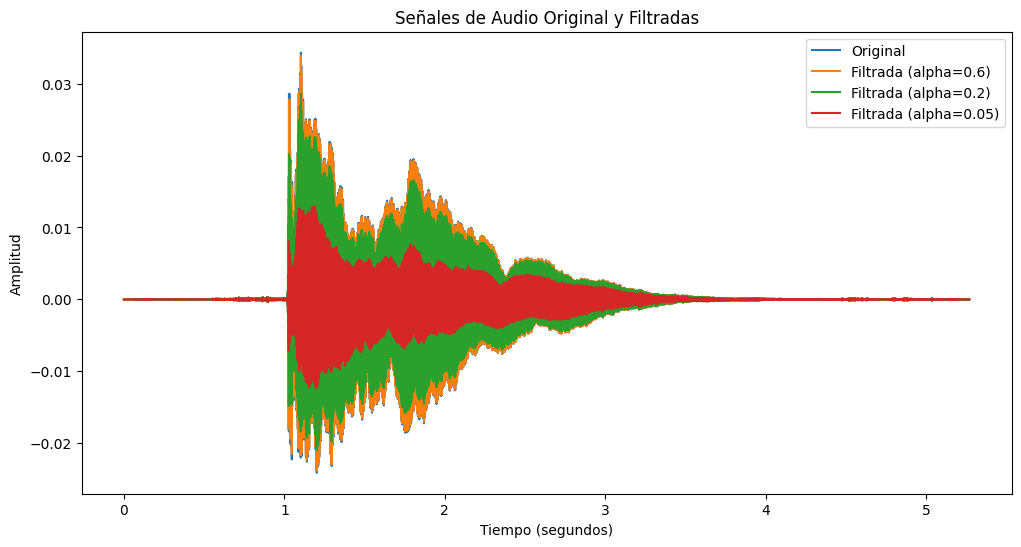

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la duración del audio (asumiendo que audio_data y sampling_rate están disponibles)
duration = len(audio_data) / sampling_rate

# Crear un vector de tiempo
time = np.linspace(0., duration, len(audio_data))

# Crear una nueva figura y ejes para el gráfico
plt.figure(figsize=(12, 6))

# Trazar las señales de audio originales y filtradas
plt.plot(time, audio_data, label='Original')
plt.plot(time, filtered_audio_0_6, label='Filtrada (alpha=0.6)')
plt.plot(time, filtered_audio_0_2, label='Filtrada (alpha=0.2)')
plt.plot(time, filtered_audio_0_05, label='Filtrada (alpha=0.05)')

# Agregar título y etiquetas
plt.title('Señales de Audio Original y Filtradas')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')

# Agregar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

## Analizar el espectro de frecuencia

Calcular y visualizar el espectro de frecuencia de las señales originales y filtradas para analizar el efecto del filtro en diferentes frecuencias.


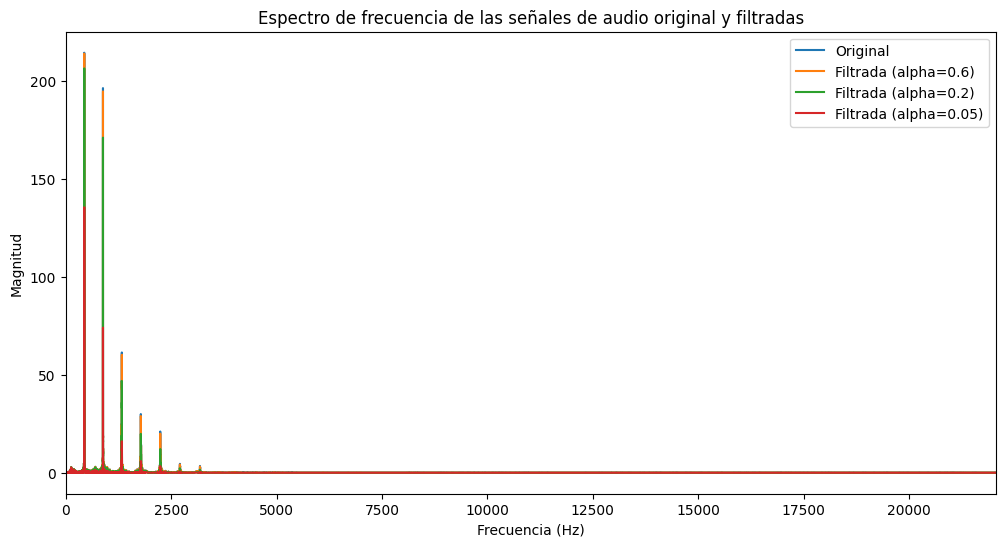

In [ ]:
from scipy.fft import fft, fftfreq

# Calcular la FFT de las señales
fft_audio = fft(audio_data.flatten())
fft_filtered_0_6 = fft(filtered_audio_0_6.flatten())
fft_filtered_0_2 = fft(filtered_audio_0_2.flatten())
fft_filtered_0_05 = fft(filtered_audio_0_05.flatten())

# Calcular las frecuencias correspondientes
n_samples = len(audio_data)
frequencies = fftfreq(n_samples, 1.0/sampling_rate)

# Calcular la magnitud de los resultados de la FFT
magnitude_audio = np.abs(fft_audio)
magnitude_filtered_0_6 = np.abs(fft_filtered_0_6)
magnitude_filtered_0_2 = np.abs(fft_filtered_0_2)
magnitude_filtered_0_05 = np.abs(fft_filtered_0_05)

# Crear una nueva figura y ejes para el gráfico
plt.figure(figsize=(12, 6))

# Trazar los espectros de magnitud
plt.plot(frequencies[:n_samples//2], magnitude_audio[:n_samples//2], label='Original')
plt.plot(frequencies[:n_samples//2], magnitude_filtered_0_6[:n_samples//2], label='Filtrada (alpha=0.6)')
plt.plot(frequencies[:n_samples//2], magnitude_filtered_0_2[:n_samples//2], label='Filtrada (alpha=0.2)')
plt.plot(frequencies[:n_samples//2], magnitude_filtered_0_05[:n_samples//2], label='Filtrada (alpha=0.05)')

# Agregar título y etiquetas
plt.title('Espectro de frecuencia de las señales de audio original y filtradas')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(0, sampling_rate/2) # Limitar a frecuencias positivas

# Agregar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

En el gráfico, el eje horizontal representa la frecuencia en Hertz (Hz), y el eje vertical representa la magnitud de la frecuencia. La magnitud nos indica la "fuerza" o amplitud de cada frecuencia en la señal de audio.

Observando las diferentes líneas:

Línea azul (Original): Muestra el espectro de frecuencia de la señal de audio sin filtrar. Puedes ver los picos de las frecuencias originales presentes en la grabación.
Líneas de colores (Filtradas): Muestran el espectro de frecuencia después de aplicar el filtro de media móvil exponencial con diferentes valores de alpha.
Notarás que a medida que el valor de alpha disminuye (0.6, 0.2, 0.05), las líneas de las señales filtradas se vuelven más suaves y se reducen las magnitudes de las frecuencias más altas. Esto demuestra que el filtro de media móvil exponencial atenúa las componentes de alta frecuencia, logrando así un suavizado de la señal. Un alpha más pequeño resulta en un mayor suavizado y una mayor atenuación de las altas frecuencias.
